In [6]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [7]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import sklearn.metrics as metrics

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
path="/content/drive/MyDrive/CreditCardFraudDetection/creditcard.csv"
df = pd.read_csv('/content/drive/MyDrive/CreditCardFraudDetection/creditcard.csv')

In [12]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
df.shape

(284807, 31)

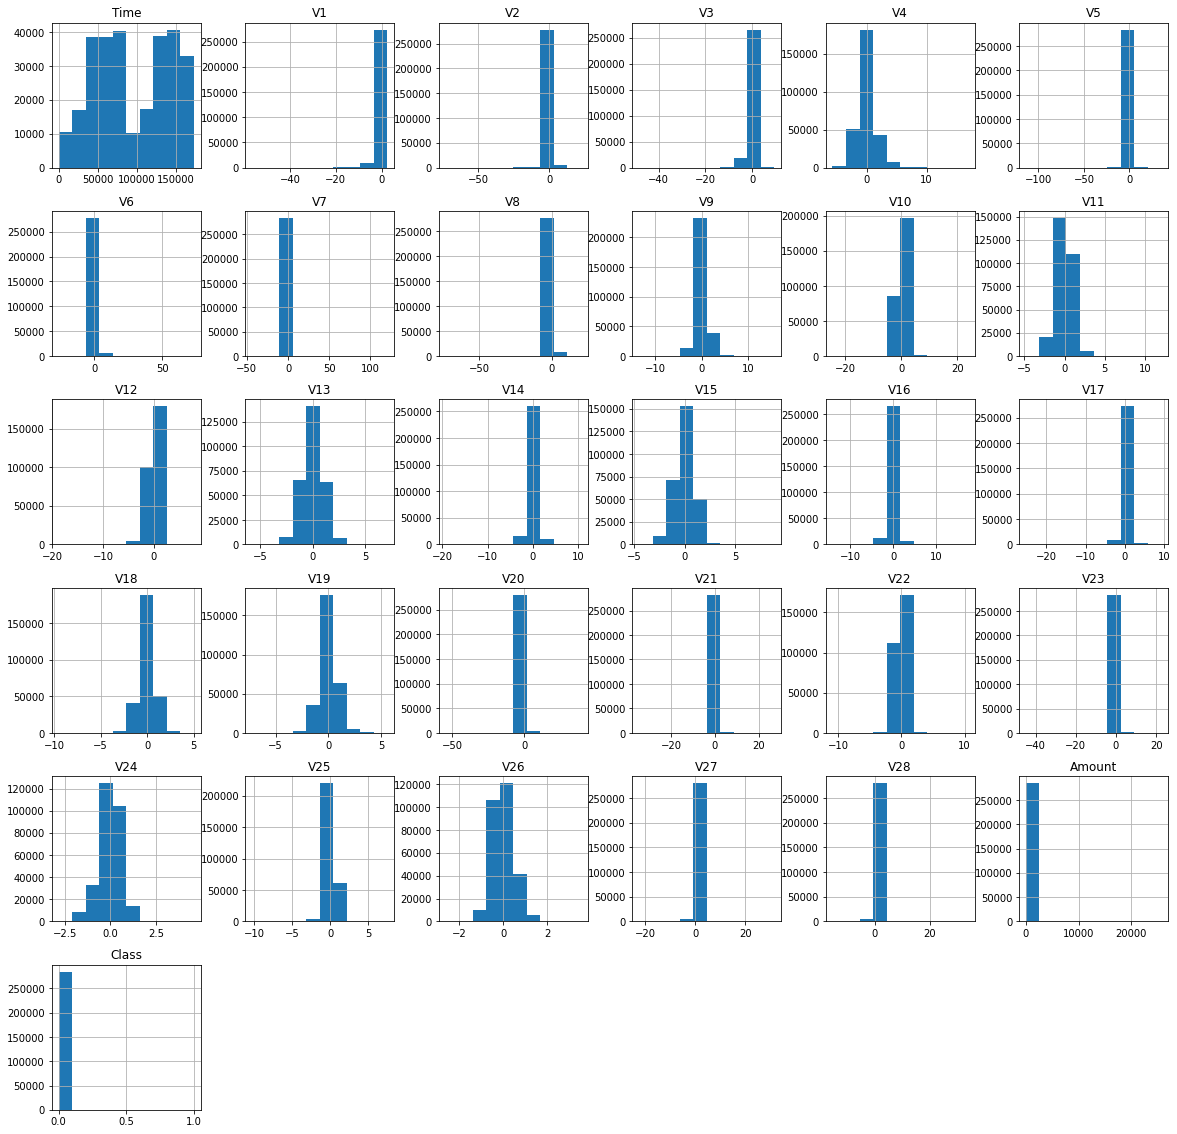

In [14]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()



In [15]:
# determine the number of fraud cases
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))

0.0017304750013189597
Fraud Cases: 492
Valid Cases: 284315


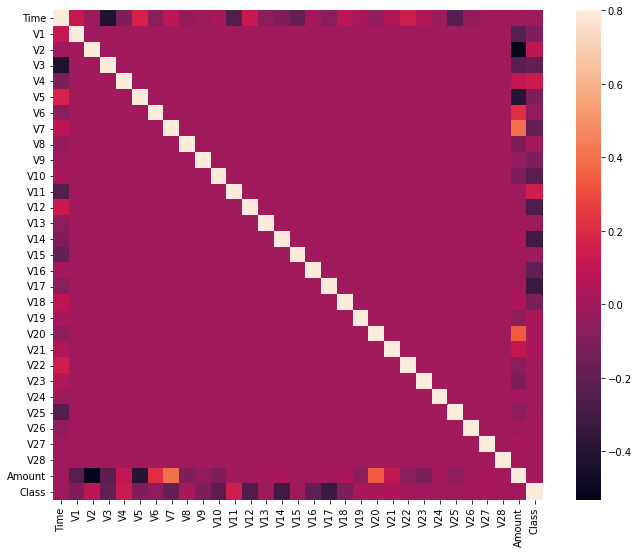

In [16]:
# correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [17]:
# get the columns from the dataframe
columns = df.columns.tolist()

# filter the columns to remove the data we do not want
columns = [c for c in columns if c not in ['Class']]

# store the variable we will be predicting on which is class
target = 'Class'

# X includes everything except our class column
X = df[columns]
# Y includes all the class labels for each sample
# this is also one-dimensional
Y = df[target]

# print the shapes of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [19]:
# define a random state
state = 1

# define the outlier detection methods
classifiers = {
    # contamination is the number of outliers we think there are
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction,
                                       random_state = state),
    # number of neighbors to consider, the higher the percentage of outliers the higher you want to make this number
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction)
}

In [20]:
#n_outliers = len(fraud)

#for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
 #   if clf_name == 'Local Outlier Factor':
 #       y_pred = clf.fit_predict(X)
  #      scores_pred = clf.negative_outlier_factor_
  #  else:
   #     clf.fit(X)
    #    scores_pred = clf.decision_function(X)
    #    y_pred = clf.predict(X)
        
    # reshape the prediction values to 0 for valid and 1 for fraud
   # y_pred[y_pred == 1] = 0
   # y_pred[y_pred == -1] = 1

    # calculate the number of errors
   # n_errors = (y_pred != Y).sum()
    
    # classification matrix
  #  print('{}: {}'.format(clf_name, n_errors))
  ##  print(accuracy_score(Y, y_pred))
   # print(classification_report(Y, y_pred))

In [21]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [24]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993960843796522


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[71077,    14],
       [   29,    82]])

In [26]:
from sklearn.neighbors  import KNeighborsClassifier
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [27]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9984691441251651


In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9987921687593045


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [41]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9992977725344794


In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [44]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995365298727564


Based on all the models used for training, **XGBoost** provides the best accuracy. 